In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from utils.explore import *

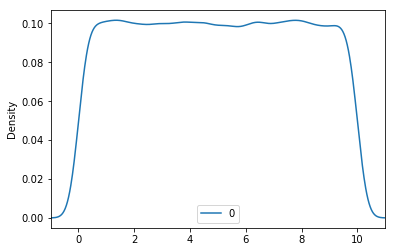

In [4]:
uniform_data = stats.uniform.rvs(size=100000, loc=0, scale=10)
pd.DataFrame(uniform_data).plot(kind="density", xlim=(-1, 11))

In [6]:
stats.uniform.cdf(x=2.5, loc=0, scale=10)

0.25

In [7]:
stats.uniform.ppf(q=0.4, loc=0, scale=10)

4.0

In [9]:
for x in range(-1, 12, 3):
    print(stats.uniform.pdf(x, loc=0, scale=10))

0.0
0.1
0.1
0.1
0.0


In [10]:
import random

In [11]:
random.randint(0, 10)

6

In [12]:
random.choice([2, 4, 6, 9])

2

In [13]:
random.random()

0.9151061153481058

In [14]:
random.uniform(0, 10)

4.293693787592074

In [17]:
random.seed(12)
print([random.uniform(0, 10) for i in range(0, 4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


In [18]:
print([random.uniform(0, 10) for i in range(0, 4)])

[0.1086044309006795, 3.7475449206336444, 2.740481394783314, 8.103480522350837]


In [19]:
random.seed(12)
print([random.uniform(0, 10) for i in range(0, 4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


## Normal distribution

In [22]:
# probability of an observation falling under -1
stats.norm.cdf(x=-1, loc=0, scale=1)

0.15865525393145707

In [24]:
# probability of an observation falling over 1
1 - stats.norm.cdf(x=1, loc=0, scale=1)

0.15865525393145707

In [25]:
1 - (stats.norm.cdf(x=-1, loc=0, scale=1) + (1- stats.norm.cdf(x=1, loc=0, scale=1)))

0.68268949213708585

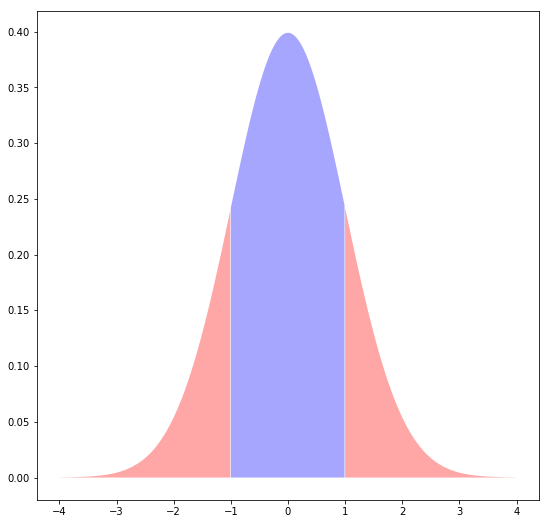

In [32]:
plt.rcParams["figure.figsize"] = (9, 9)

plt.fill_between(
    x=np.arange(-4, -1, 0.01),
    y1=stats.norm.pdf(np.arange(-4, -1, 0.01)),
    facecolor="red",
    alpha=0.35
)

plt.fill_between(
    x=np.arange(-1, 1, 0.01),
    y1=stats.norm.pdf(np.arange(-1, 1, 0.01)),
    facecolor="blue",
    alpha=0.35
)

plt.fill_between(
    x=np.arange(1, 4, 0.01),
    y1=stats.norm.pdf(np.arange(1, 4, 0.01)),
    facecolor="red",
    alpha=0.35
)

In [33]:
print(stats.norm.ppf(q=0.25))
print(stats.norm.ppf(q=0.975))

-0.674489750196
1.95996398454


## Binomial distribution

In [37]:
fair_coin_flips = stats.binom.rvs(n=10, p=0.5, size=10000)
pd.crosstab(
    index="counts", columns=fair_coin_flips
)

col_0,0,1,2,3,4,5,6,7,8,9,10
row_0,,,,,,,,,,,
counts,15,90,450,1138,2061,2445,2101,1148,443,97,12


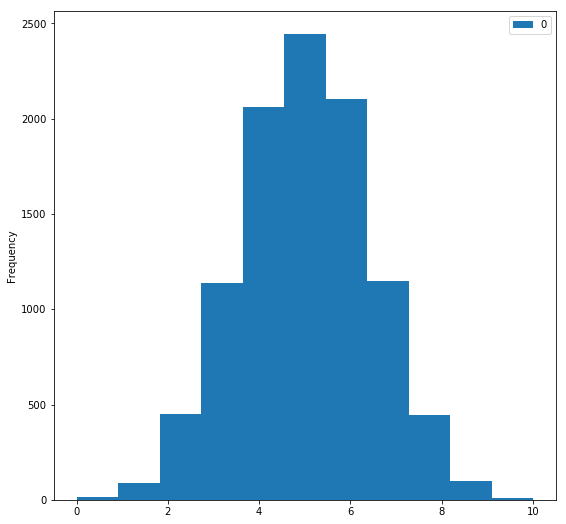

In [42]:
pd.DataFrame(fair_coin_flips).plot(kind="hist", bins=11)

In [65]:
biased_coin_flips = stats.binom.rvs(p=0.8, n=10, size=10000)
pd.crosstab(index="counts", columns=biased_coin_flips)

col_0,2,3,4,5,6,7,8,9,10
row_0,,,,,,,,,
counts,1,11,53,269,826,2009,2950,2751,1130


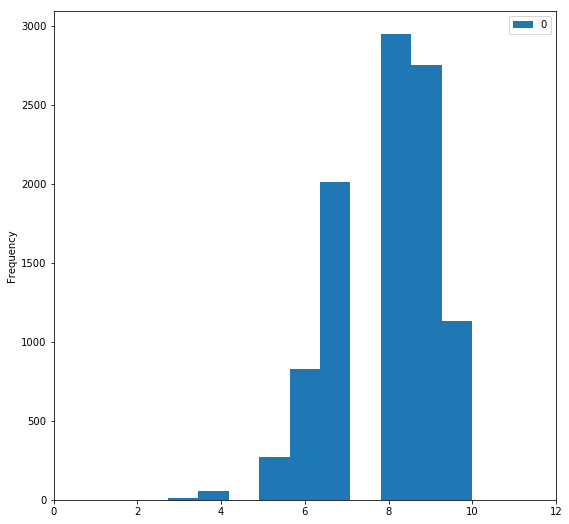

In [69]:
pd.DataFrame(biased_coin_flips).plot(kind="hist", xlim=(0, max(biased_coin_flips) + 2), bins=max(biased_coin_flips) + 1)

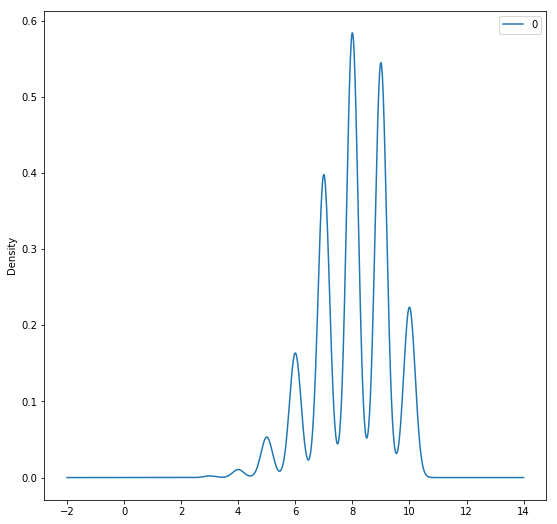

In [47]:
pd.DataFrame(biased_coin_flips).plot(kind="density")

In [48]:
stats.binom.cdf(k=5, n=10, p=0.8)

0.032793497599999964

In [49]:
1 - stats.binom.cdf(k=9, n=10, p=0.8)

0.10737418240000007

In [51]:
stats.binom.pmf(k=5, n=10, p=0.8)

0.026424115200000039

In [52]:
stats.binom.pmf(k=8, n=10, p=0.8)

0.30198988799999998

## Geometric, exponential distributions

In [57]:
random.seed(12)
flips_till_heads = stats.geom.rvs(size=10000, p=0.5)
pd.crosstab(index="counts", columns=flips_till_heads)

col_0,1,2,3,4,5,6,7,8,9,10,11,12,13,16
row_0,,,,,,,,,,,,,,
counts,4959,2544,1226,623,324,152,73,57,24,6,9,1,1,1


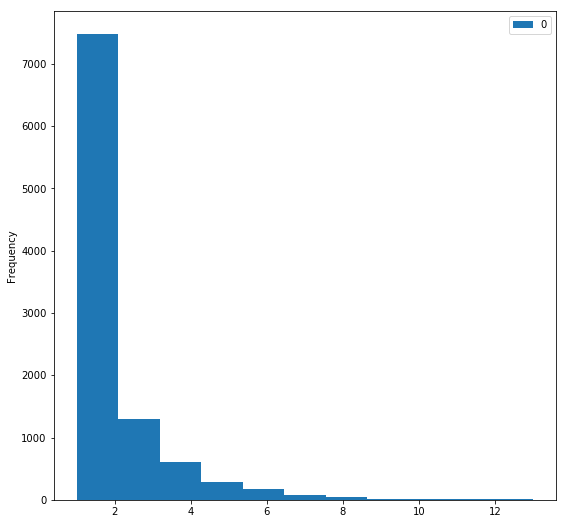

In [56]:
pd.DataFrame(flips_till_heads).plot(kind="hist", bins=11)

In [58]:
1 - stats.geom.cdf(k=5, p=0.5)

0.03125

In [59]:
1 - stats.expon.cdf(x=1, scale=1)

0.36787944117144233

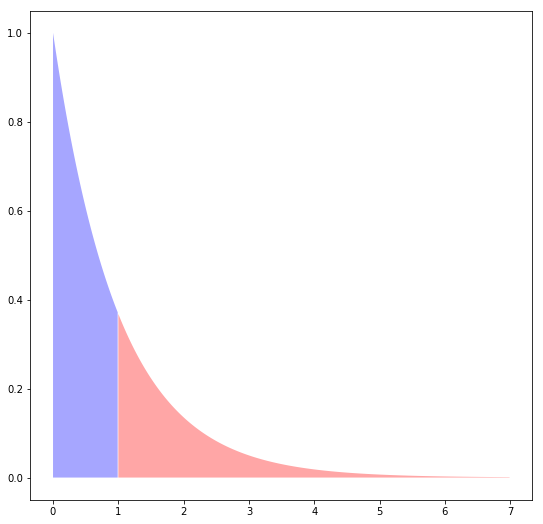

In [61]:
plt.fill_between(
    x=np.arange(0, 1, 0.01),
    y1=stats.expon.pdf(np.arange(0, 1, 0.01)),
    facecolor="blue",
    alpha=0.35
)

plt.fill_between(
    x=np.arange(1, 7, 0.01),
    y1=stats.expon.pdf(np.arange(1, 7, 0.01)),
    facecolor="red",
    alpha=0.35
)

## Poisson distribution

In [62]:
random.seed(12)
ar_1 = stats.poisson.rvs(size=10000, mu=1)

pd.crosstab(index="counts", columns=ar_1)

col_0,0,1,2,3,4,5,6,7
row_0,,,,,,,,
counts,3658,3702,1807,629,167,31,5,1


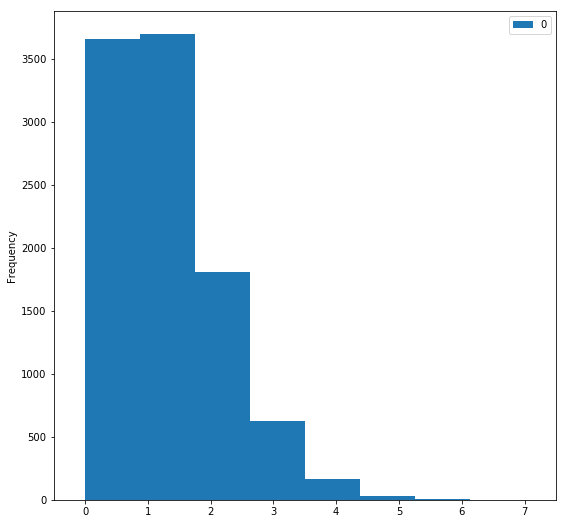

In [64]:
pd.DataFrame(ar_1).plot(kind="hist", xlim=(-0.5, max(ar_1) + 0.5), bins=max(ar_1) + 1)

In [70]:
random.seed(12)
ar_10 = stats.poisson.rvs(size=10000, mu=10)

pd.crosstab(index="counts", columns=ar_10)

col_0,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
row_0,,,,,,,,,,,,,,,,,,,,,
counts,2,3,27,74,213,349,630,879,1149,1212,...,210,137,80,27,18,8,1,1,1,1


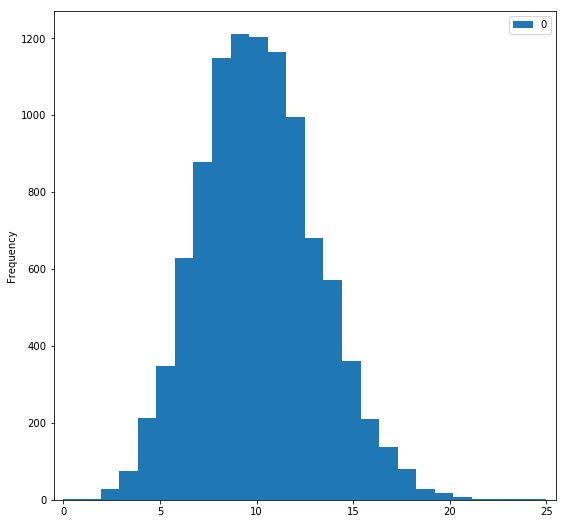

In [73]:
pd.DataFrame(ar_10).plot(kind="hist", xlim=(-0.5, max(ar_10 + 0.5)), bins=max(ar_10) + 1)

In [75]:
# the probability of getting 5 arrivals or less w/ar=10
stats.poisson.cdf(k=5, mu=10)

0.067085962879031888

In [77]:
# the probability of getting exactly 10 arrivals w/ar=10
stats.poisson.pmf(k=10, mu=10)

0.12511003572113372